In [5]:
import sys
import os
import multiprocessing as mp
import numpy as np
import traceback
import time
import matplotlib.pyplot as plt
import peakutils

# on server
sys.path.append('/home/jtb34/GitHub/GACF')
from NGTS.NGTS_Field import NGTSField as NF
from NGTS.NGTS_Object import NGTSObject as NO


In [4]:
from astropy.stats import LombScargle

In [6]:
obj = NO(field='NG0004-2950', obj=626, test='CYCLE1802')

In [7]:
obj.get_binned_data()


	 All-NaN slice encountered



In [10]:
obj.calculate_periods_from_autocorrelation(calculate_noise_threshold=True)

Calculating correlations: 100%|█████████▉| 2311/2312.0 [00:04<00:00, 513.83it/s]
Calculating correlations:   1%|          | 28/2312.0 [00:10<14:19,  2.66it/s]
	 Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)

Calculating correlations: 100%|█████████▉| 2311/2312.0 [05:58<00:00,  6.44it/s]
Calculating Noise Fourier Transforms:   0%|          | 0/998 [00:00<?, ?it/s]
	 divide by zero encountered in divide

Calculating Noise Fourier Transforms: 100%|██████████| 998/998 [00:05<00:00, 168.98it/s]


In [22]:
frequency, power = LombScargle(obj.timeseries_binned, obj.flux_binned).autopower()
period = np.divide(1.0, frequency)

indexes = peakutils.indexes(power, thres=0.1,  # Fraction of largest peak
                                min_dist=5  # Number of data points between
                                )

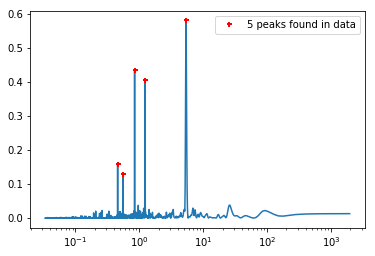

In [25]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(period, power)
ax.plot(period[indexes], power[indexes], 'r+', ms=5, mew=2,
            label='{} peaks found in data'.format(len(indexes)))
ax.legend()
plt.show()

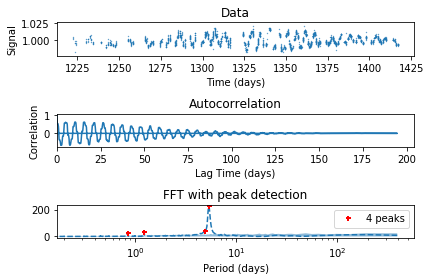

In [13]:
obj.plot_data_autocol_ft(interactive=True)

In [17]:
frequency_acf, power_acf = LombScargle(obj.lag_timeseries, obj.correlations).autopower()
period_acf = np.divide(1.0, frequency_acf)

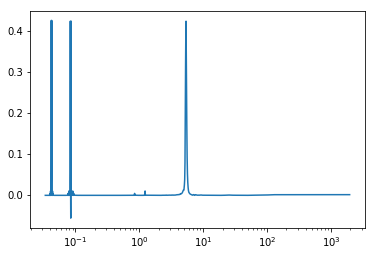

In [18]:
fig_acf, ax_acf = plt.subplots()
ax_acf.set_xscale('log')
ax_acf.plot(period_acf, power_acf)
plt.show()

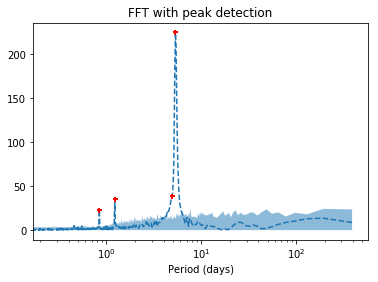

In [50]:
obj.plot_ft(interactive=True)

In [32]:
ls_periods = period[indexes]
gacf_periods = obj.periods 

In [33]:
print "Lomb Scargle", ls_periods
print "G-ACF", gacf_periods

Lomb Scargle [5.36563728 1.22575603 0.84135047 0.55036065 0.4564627 ]
G-ACF [5.338545591623815, 1.2255151829828252, 0.8417145317247052, 4.871422852356731]


In [45]:
def get_alises(base_period, num_aliases=3):
    aliases = []
    for n in range(1, num_aliases):
        P1 = base_period/(1+n*base_period)
        P2 = abs(base_period/(1-n*base_period))
        aliases.append((P1, P2))
    return aliases

In [35]:
for idx in indexes:
    print period[idx], power[idx]

5.365637284354906 0.5809385773041515
1.225756031605306 0.4061863291043405
0.8413504683459313 0.43588945789644507
0.550360648268107 0.1297982584059041
0.45646269843469217 0.15821284554063225


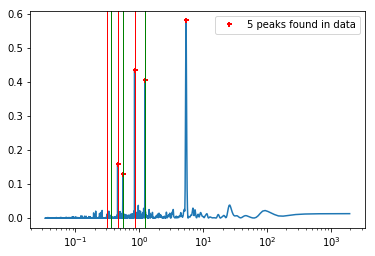

In [49]:
aliases = get_alises(ls_periods[0], 4)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(period, power)
ax.plot(period[indexes], power[indexes], 'r+', ms=5, mew=2,
            label='{} peaks found in data'.format(len(indexes)))
for alias in aliases:
    ax.axvline(x=alias[0], c='r', lw=1)
    ax.axvline(x=alias[1], c='g', lw=1)
ax.legend()
plt.show()

In [52]:
for idx in obj.peak_indexes:
    print obj.period_axis[idx], obj.ft[idx]

5.338545591623815 224.8304875122668
1.2255151829828252 35.19861728364078
0.8417145317247052 23.394436464516883
4.871422852356731 39.320729474214616


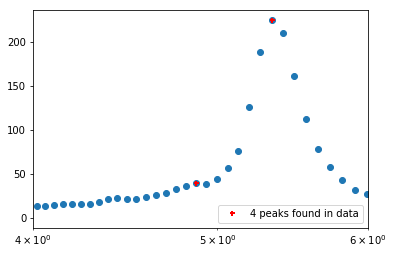

In [56]:
aliases = get_alises(gacf_periods[0], 4)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.scatter(obj.period_axis, obj.ft)
ax.plot(obj.period_axis[obj.peak_indexes], obj.ft[obj.peak_indexes], 'r+', ms=5, mew=2,
            label='{} peaks found in data'.format(len(obj.peak_indexes)))
for alias in aliases:
    ax.axvline(x=alias[0], c='r', lw=1)
    ax.axvline(x=alias[1], c='g', lw=1)
ax.set_xlim([4, 6])
ax.legend()
plt.show()